Scraping Data from Twitter (can be replaced with any other data)

Install Tweepy using - "pip install tweepy" in command line

In [2]:
import tweepy

consumer_key = "wXXXXXXXXXXXXXXXXXXXXXXX1"
consumer_secret = "qXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXh"
access_token = "9XXXXXXXX-XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXi"
access_token_secret = "kXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXT"

# Creating the authentication object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# Setting your access token and secret
auth.set_access_token(access_token, access_token_secret)
# Creating the API object while passing in auth information
api = tweepy.API(auth) 

ModuleNotFoundError: No module named 'tweepy'

Following 3 cells scraps 3 different data:

1) Your Timeline

2) Tweets from a Specific User

3) Finding Tweets Using a Keyword

ONLY RUN 1 FROM THE FOLLOWING 3 CELLS!!

In [ ]:
# Using the API object to get tweets from your timeline, and storing it in a variable called public_tweets
public_tweets = api.home_timeline()
# foreach through all tweets pulled
for tweet in public_tweets:
   # printing the text stored inside the tweet object
   print tweet.text

In [ ]:
# Creating the API object while passing in auth information
api = tweepy.API(auth)

# The Twitter user who we want to get tweets from
name = "nytimes"
# Number of tweets to pull
tweetCount = 20

# Calling the user_timeline function with our parameters
results = api.user_timeline(id=name, count=tweetCount)

# foreach through all tweets pulled
for tweet in results:
   # printing the text stored inside the tweet object
   print tweet.text

In [ ]:
# Creating the API object while passing in auth information
api = tweepy.API(auth)

# The search term you want to find
query = "Toptal"
# Language code (follows ISO 639-1 standards)
language = "en"

# Calling the user_timeline function with our parameters
results = api.search(q=query, lang=language)

# foreach through all tweets pulled
for tweet in results:
   # printing the text stored inside the tweet object
   print tweet.user.screen_name,"Tweeted:",tweet.text

Save to Excel file

In [ ]:
csvFile = open('fried_chicken.csv','a')

csvWriter = csv.writer(csvFile)
for tweet in tweepy.Cursor(api.search,q='fried chicken'),count=100,
                           lang='en',
                           since='').items();
            csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8')])
            print(tweet.created_at, tweet.text)
csvFile.close()

Sentiment Analysis - pip install textblob

In [4]:
import csv
import pandas as pd
# import io if using google colab
import numpy as np
import re
from textblob import TextBlob


#Import dataset
df = pd.read_csv('fried_chicken.csv')

df.head()

df.describe()

#Sentiment analysis
def sentiment_calc(text):
    try:
        return TextBlob(text).sentiment
    except:
        return None
    
#Create column 'sentiment', apply column 'tweet' with sentiment calculation
df['sentiment'] = df['tweet'].apply(sentiment_calc)

#(polarity, subjectivity) - range: -1,0,1

df.head()

# Check first line
df.iloc[:1]

df.iloc[:1]['tweet']

0    b'NEWS: KFC SPREADS US$150M WINGS IN ZIM\n\nTh...
Name: tweet, dtype: object

Cleaning & Analysis Tweets & Sentiments

In [7]:
def clean_tweet(tweet):
    # To clean text in a tweet by removing links and special characters using regex
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    # To classify polarity of tweet using textblob
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

# create column with result of analysis: -1,0,1
df['SA'] = np.array([analize_sentiment(text) for text in df['tweet'] ])

#display updated dataframe with new column
display(df.head(10))


,date,tweet,sentiment,SA
0,15/02/2019 9:14,b'NEWS: KFC SPREADS US$150M WINGS IN ZIM\n\nTh...,"(-0.3, 0.475)",-1
1,15/02/2019 9:13,"b""RT @skizyman: I still can't believe there wa...","(0.0, 0.0)",0
2,15/02/2019 9:13,b'RT @DanneelHarris: Happy Valentine\xe2\x80\x...,"(0.325, 0.5305555555555554)",1
3,15/02/2019 9:11,b'KFC Has A Fried Chicken Sandwich With Mac &a...,"(-0.6, 0.95)",-1
4,15/02/2019 9:10,"b""RT @skizyman: I still can't believe there wa...","(0.0, 0.0)",0
5,15/02/2019 9:10,"b""\xf0\x9f\x8d\x94TODAY'S BURGER OF THE DAY is...","(-0.3, 0.475)",-1
6,15/02/2019 9:10,b'RT @DanneelHarris: Happy Valentine\xe2\x80\x...,"(0.325, 0.5305555555555554)",1
7,15/02/2019 9:08,"b""RT @skizyman: I still can't believe there wa...","(0.0, 0.0)",0
8,15/02/2019 9:08,b'RT @d0nghues: #ikonicselcaday our faces when...,"(-0.6, 0.95)",-1
9,15/02/2019 9:07,"b'RT @ItsFoodPorn: Fried Chicken, Fries &amp; ...","(-0.6, 0.95)",-1


In [9]:
mean = np.mean(df['SA'])

print("The sentiments average in tweets: {}".format(mean))

The sentiments average in tweets: -0.6294712754426111


Breakdown of Sentiment: (positive, neutral, negative)

In [13]:
pos_tweets = [tweet for index, tweet in enumerate(df['tweet']) if df['SA'][index] >  0]
neu_tweets = [tweet for index, tweet in enumerate(df['tweet']) if df['SA'][index] == 0]
neg_tweets = [tweet for index, tweet in enumerate(df['tweet']) if df['SA'][index] <  0]

In [14]:
per_pos = len(pos_tweets)*100/len(df['tweet'])
per_neu = len(neu_tweets)*100/len(df['tweet'])
per_neg = len(neg_tweets)*100/len(df['tweet'])

In [15]:
print(per_pos)
print(per_neu)
print(per_neg)

15.663013368661929
5.7268457184150305
78.61014091292304


In [16]:
import matplotlib.pyplot as plt

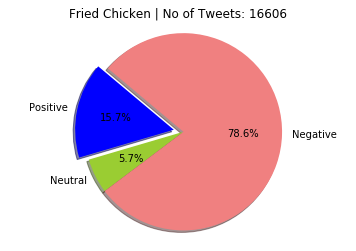

In [17]:
#data to plot
labels = 'Positive', 'Neutral', 'Negative'
sizes = [per_pos, per_neu, per_neg]
colors = ['blue', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0) #explode 1st slice

#plot
plt.pie(sizes, explode = explode, labels=labels, colors=colors, autopct ='%1.1f%%', shadow=True, startangle = 140)
plt.title('Fried Chicken | No of Tweets: 16606')
plt.axis('equal')
plt.show()

Generating WordCloud - pip install wordcloud, pip install pillow

In [18]:
from wordcloud import WordCloud

In [20]:
# Combine all text into 1 long text
df_wc = " ".join(text for text in df.tweet)

print("There are {} words in the combination of all review.".format(len(df_wc)))

There are 2159753 words in the combination of all review.


In [21]:
wordcloud2 = WordCloud(background_color ="white").generate(df_wc)

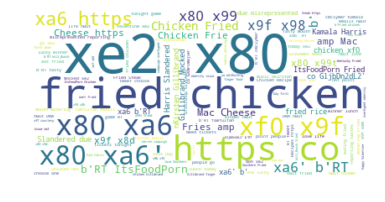

In [23]:
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

Negative Word Cloud

In [24]:
newc = df.loc[df['SA'] == -1]
neText = " ".join(tweet for tweet in newc.tweet)
print("There are {} words in the combination of all tweets.".format(len(neText)))

There are 1620920 words in the combination of all tweets.


In [25]:
wordcloud_ne = WordCloud(background_color ="white").generate(neText)

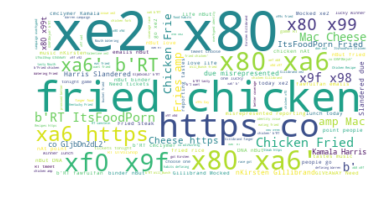

In [26]:
plt.imshow(wordcloud_ne, interpolation='bilinear')
plt.axis("off")
plt.show()

Positive Word Cloud

In [30]:
powc = df.loc[df['SA'] == 1]
poText = " ".join(tweet for tweet in powc.tweet)
print("There are {} words in the combination of all tweets.".format(len(poText)))

There are 389513 words in the combination of all tweets.


In [31]:
wordcloud_po = WordCloud(background_color ="white").generate(poText)

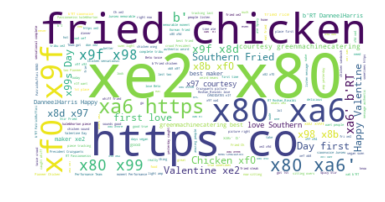

In [32]:
plt.imshow(wordcloud_po, interpolation='bilinear')
plt.axis("off")
plt.show()